In [209]:
# import the necessary packages
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [210]:
#load images
image_path = "half_breadboard_example.jpg"
template_path = "template_half_annotated.png"

img = cv2.imread(image_path)
template = cv2.imread(template_path)
img = img.astype(np.uint8)
template = template.astype(np.uint8)

In [211]:
gray_template= cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
thr_template,dst_template = cv2.threshold(gray_template, 60, 255, cv2.THRESH_BINARY)

cont_template, hier_template = cv2.findContours(dst_template, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
border_cont_template = cont_template[2]

In [212]:
#finding template border coords
x, y, w, h = cv2.boundingRect(border_cont_template)

#draw border in green
output = cv2.rectangle(template, (x, y), (x + w, y + h), (0, 255, 0), 2)

src_points = np.array([[x, y],
                       [x+w, y],
                       [x+w, y+h],
                       [x, y+h]], dtype='float32')

#draw border cont in blue
output = cv2.drawContours(template, cont_template, 2, (255,0,0),1)

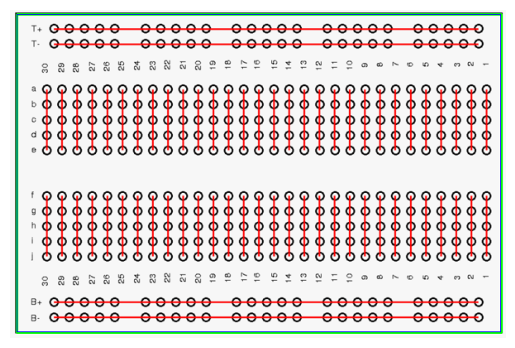

In [213]:

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [214]:
gray_img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)

#thr_img,dst_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)
dst_img = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cont_img, hier_img = cv2.findContours(dst_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_sorted = sorted(cont_img, key=cv2.contourArea, reverse=True)

#finding template border coords
x, y, temp_w, temp_h = cv2.boundingRect(cont_sorted[2])

In [215]:
#finding template border coords
x, y, temp_w, temp_h = cv2.boundingRect(cont_sorted[2])

#draw border in green
#offset included for connection protrusions
output = cv2.rectangle(img, (x+20, y), (x -10+ temp_w, y + temp_h), (0, 255, 0), 3)

dst_points = np.array([[x+20, y],
                       [x-10+temp_w, y],
                       [x-10+temp_w, y+temp_h],
                       [x+20, y+temp_h]], dtype='float32')

#draw border cont in blue
#output = cv2.drawContours(img, cont_sorted, 1, (255,0,0),3)

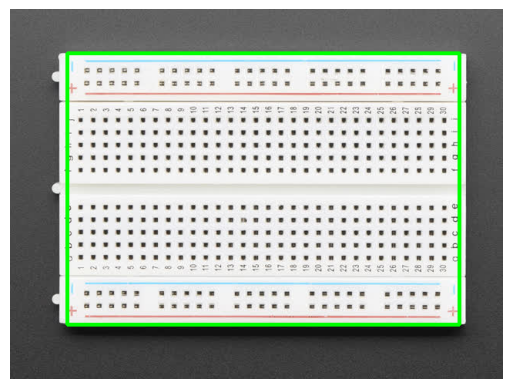

In [216]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

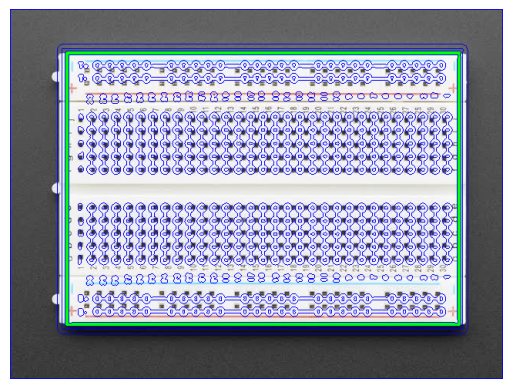

In [217]:
H, status = cv2.findHomography(src_points,dst_points)

height, width = img.shape[:2]
warp = cv2.warpPerspective(template, H, (width,height))

gray_img= cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_img, (5, 5), 0)

#thr_img,dst_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)
dst_img = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cont_img, hier_img = cv2.findContours(dst_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#print(img.shape())
#print(scale_warp.shape())

#output = cv2.addWeighted(img, 0.5, warp, 0.5, 0)
output = cv2.drawContours(img, cont_img, -1, (255,0,0),1)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
